In [4]:
import pandas as pd

In [3]:
!pip install mysql-connector-python

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/d9/91/007a0d60fee8db4f7385075dc50bf62d2d359b417b374ec06b06ce6c2d64/mysql_connector_python-8.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/15.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.4 MB 325.1 kB/s eta 0:00:48
   ---------------------------------------- 0.1/15.4 MB 901.1 kB/s eta 0:00:17
   - -------------------------------------- 0.5/15.4 MB 3.2 MB/s eta 0:00:05
   -- ------------------------------------- 1.1/15.4 MB 5.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.9/15.4 MB 7.4 MB/s eta 0:00:02
   ------ --------------------------------- 2.5/15.4 MB 8.5 MB/s eta 0:00:02
   -------- ------------------------------- 3.1/15.4 MB 9.0 MB/s eta 0:00:02
   ---------- ----------------------------- 4.0/15.4 MB 10.2 MB/s eta 0:00:02
 

In [6]:
import mysql.connector

In [10]:
sql = mysql.connector.connect(host='127.0.0.1',user='root',password='Alvira@98',database='ipcdata')

In [12]:
query = """SELECT c1.`STATE/UT`, c1.`YEAR`, c1.`DISTRICT`, c1.`MURDER` FROM  ipcdata.ipc c1 JOIN (SELECT `STATE/UT`, `YEAR`, MAX(`MURDER`) AS MaxMurder FROM ipcdata.ipc GROUP BY `STATE/UT`, `YEAR`) c2 ON c1.`STATE/UT` = c2.`STATE/UT` AND c1.`Year` = c2.`Year` AND c1.`MURDER` = c2.MaxMurder ORDER BY c1.`STATE/UT`, c1.`Year`;"""

In [14]:
df = pd.read_sql(query, sql)
sql.close()

C:\Users\alvir\AppData\Local\Temp\ipykernel_13504\1317946279.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, sql)


In [15]:
total_district = df.groupby(['STATE/UT', 'DISTRICT']).size()
filtering_districts = district_counts[district_counts >= 3].index

In [18]:
df_filter = df[df.set_index(['STATE/UT', 'DISTRICT']).index.isin(filtering_districts)]
dfnew = df_filter.sort_values(by=['MURDER', 'YEAR'], ascending=False)
print(dfnew)

          STATE/UT  YEAR     DISTRICT  MURDER
440  UTTAR PRADESH  2001        TOTAL    7601
441  UTTAR PRADESH  2002        TOTAL    6825
443  UTTAR PRADESH  2004        TOTAL    6126
444  UTTAR PRADESH  2005        TOTAL    5711
445  UTTAR PRADESH  2006        TOTAL    5480
..             ...   ...          ...     ...
261    LAKSHADWEEP  2004        TOTAL       0
258    LAKSHADWEEP  2003  LAKSHADWEEP       0
259    LAKSHADWEEP  2003        TOTAL       0
256    LAKSHADWEEP  2002  LAKSHADWEEP       0
257    LAKSHADWEEP  2002        TOTAL       0

[474 rows x 4 columns]


In [33]:
import mysql.connector

In [34]:
sql = mysql.connector.connect(host='127.0.0.1',user='root',password='Alvira@98',database='ipcdata')

In [35]:
query1 = "SELECT c1.`STATE/UT`, c1.`YEAR`, c1.`DISTRICT`, c1.`MURDER` FROM ipcdata.ipc c1 JOIN (SELECT `STATE/UT`, `YEAR`, MAX(`MURDER`) AS MaxMurder FROM ipcdata.ipc  WHERE `DISTRICT` != 'TOTAL'  GROUP BY `STATE/UT`, `YEAR`) c2 ON c1.`STATE/UT` = c2.`STATE/UT` AND c1.`Year` = c2.`Year` AND c1.`MURDER` = c2.MaxMurder WHERE c1.`DISTRICT` != 'TOTAL' ORDER BY c1.`STATE/UT`, c1.`Year`;"

In [36]:
df1 = pd.read_sql(query, sql)
sql.close()

C:\Users\alvir\AppData\Local\Temp\ipykernel_13504\36287623.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query, sql)


In [ ]:
total_district1 = df.groupby(['STATE/UT', 'DISTRICT']).size()
filtering_districts1 = district_counts[district_counts >= 3].index

In [50]:
df_filter1 = df[df.set_index(['STATE/UT', 'DISTRICT']).index.isin(filtering_districts1)]
dfnew1 = df_filter1.sort_values(by=['MURDER', 'YEAR'], ascending=False)
print(dfnew1)

          STATE/UT  YEAR     DISTRICT  MURDER
440  UTTAR PRADESH  2001        TOTAL    7601
441  UTTAR PRADESH  2002        TOTAL    6825
443  UTTAR PRADESH  2004        TOTAL    6126
444  UTTAR PRADESH  2005        TOTAL    5711
445  UTTAR PRADESH  2006        TOTAL    5480
..             ...   ...          ...     ...
261    LAKSHADWEEP  2004        TOTAL       0
258    LAKSHADWEEP  2003  LAKSHADWEEP       0
259    LAKSHADWEEP  2003        TOTAL       0
256    LAKSHADWEEP  2002  LAKSHADWEEP       0
257    LAKSHADWEEP  2002        TOTAL       0

[474 rows x 4 columns]


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

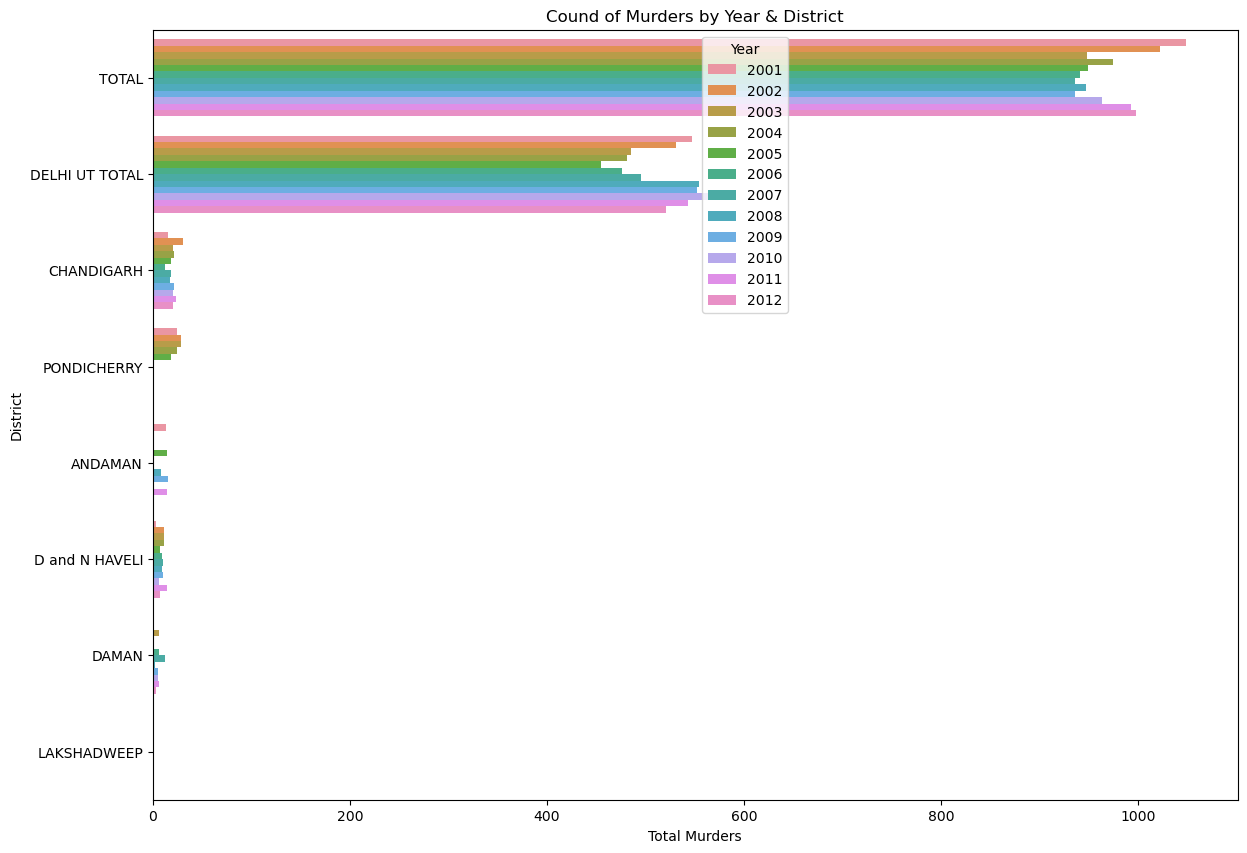

In [47]:
plt.figure(figsize=(14, 10))
sns.barplot(x='MURDER', y='DISTRICT', hue='YEAR', data=dfnew, errorbar=None)
plt.xlabel('Total Murders')
plt.ylabel('District')
plt.title('Cound of Murders by Year & District')
plt.legend(title='Year', bbox_to_anchor=(0.5, 1), loc=2)
plt.show()

In [52]:
df_filtered = df[df['DISTRICT'] != 'TOTAL']
district_counts = df_filtered.groupby(['STATE/UT', 'DISTRICT']).size()
districts_3 = district_counts[district_counts >= 3].index
df_result = df_filtered[df_filtered.set_index(['STATE/UT', 'DISTRICT']).index.isin(districts_3)].sort_values(by=['MURDER', 'YEAR'], ascending=[False, False])
print(df_result)

        STATE/UT  YEAR        DISTRICT  MURDER
155     DELHI UT  2010  DELHI UT TOTAL     565
153     DELHI UT  2008  DELHI UT TOTAL     554
154     DELHI UT  2009  DELHI UT TOTAL     552
146     DELHI UT  2001  DELHI UT TOTAL     547
156     DELHI UT  2011  DELHI UT TOTAL     543
..           ...   ...             ...     ...
266  LAKSHADWEEP  2007     LAKSHADWEEP       0
264  LAKSHADWEEP  2006     LAKSHADWEEP       0
260  LAKSHADWEEP  2004     LAKSHADWEEP       0
258  LAKSHADWEEP  2003     LAKSHADWEEP       0
256  LAKSHADWEEP  2002     LAKSHADWEEP       0

[66 rows x 4 columns]


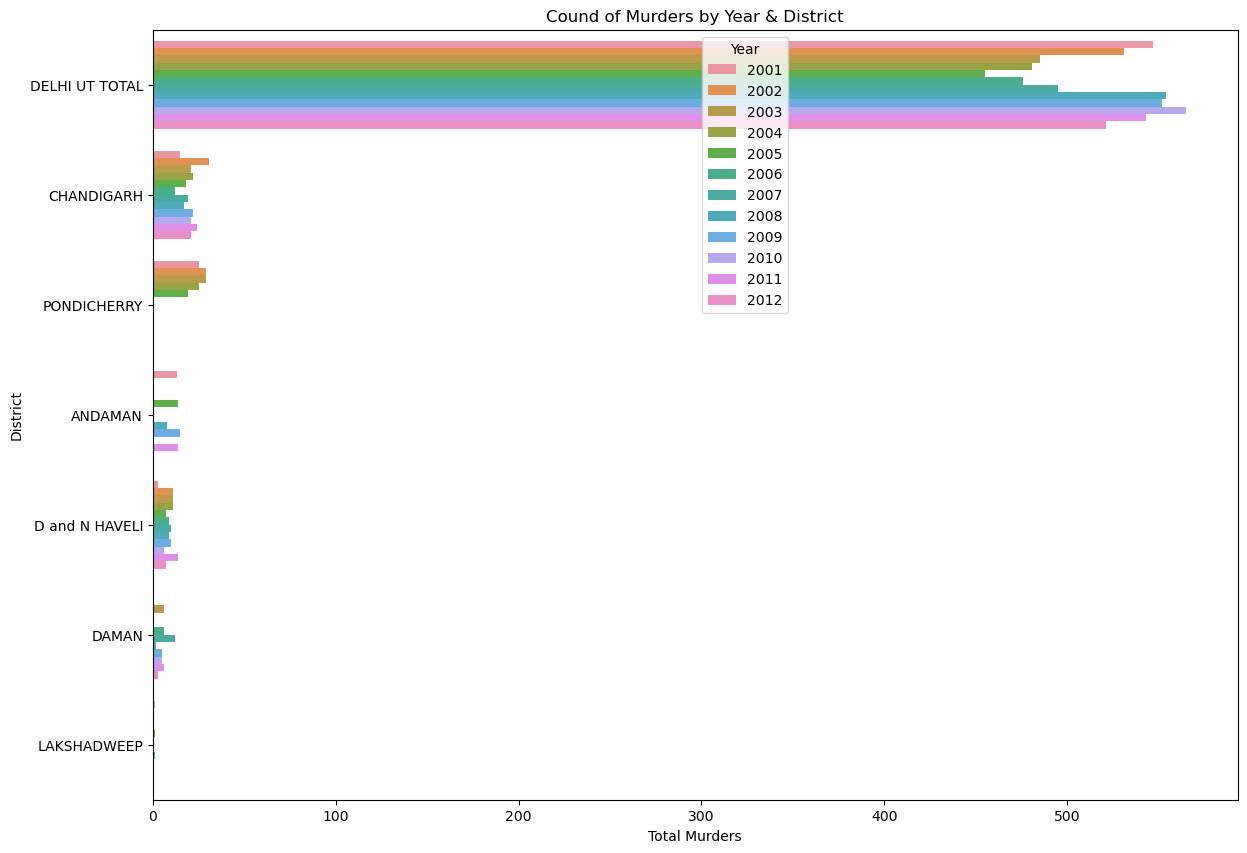

In [53]:
plt.figure(figsize=(14, 10))
sns.barplot(x='MURDER', y='DISTRICT', hue='YEAR', data=df_result, errorbar=None)
plt.xlabel('Total Murders')
plt.ylabel('District')
plt.title('Cound of Murders by Year & District')
plt.legend(title='Year', bbox_to_anchor=(0.5, 1), loc=2)
plt.show()